**Leer Imagen y Limpiar**

In [1]:
#Librería de imágenes y Matplotlib (gráficas)
import cv2 
import matplotlib.pylab as plt

In [2]:
#Librería para OS
import os

In [3]:
#Libreria de Google para mostra Imágenes
from google.colab.patches import cv2_imshow

In [4]:
# Activar Google Drive.
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [5]:
#Las imágenes a entrenar fueron previamente guardadas en la siguiente ubicación del Drive
!ls '/content/drive/My Drive/Manuales/Inteligencia Artificial/Base de Captcha'

 BCaptcha2.jpg	 BCaptcha.jpg   Captcha3.png   model.h5
 BCaptcha3.jpg	 Captcha2.jpg   Captcha.jpg   'Untitled drawing.gdraw'


In [6]:
#Colocarse en la Carpeta
pathImagenes='/content/drive/My Drive/Manuales/Inteligencia Artificial/Base de Captcha'

In [7]:
#Cargar Imagen
nombreImagen=pathImagenes+'/'+'Captcha.jpg'
print(nombreImagen)
img=cv2.imread(nombreImagen)

/content/drive/My Drive/Manuales/Inteligencia Artificial/Base de Captcha/Captcha.jpg


In [8]:
#Mostrar imagen
#cv2.imshow(img) No VALE este código
cv2_imshow(img)
#print(img)

In [9]:
#AumentarTamaño
scale_percent = 520 # Porcentaje
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height)
#    print(dim)
img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)

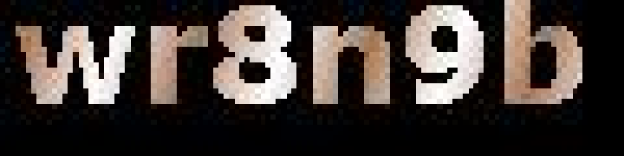

In [10]:
#Mostrar imagen
#cv2.imshow(img) No VALE este código
cv2_imshow(img)

In [11]:
#Erode
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
#img = cv2.dilate(img,kernel, iterations = 3)
#img = cv2.dilate(img,kernel, iterations = 1)
img = cv2.erode(img,kernel,iterations = 3)

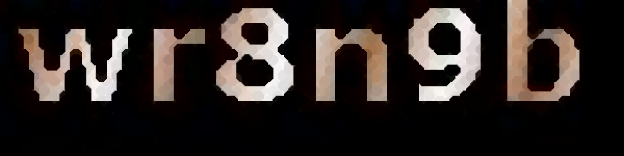

In [12]:
#Mostrar imagen
#cv2.imshow(img) No VALE este código
cv2_imshow(img)

In [13]:
#B/N Threshold
imgray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
imgray = cv2.GaussianBlur(imgray,(5,5),0)
ret,thresh = cv2.threshold(imgray,100,255,0)


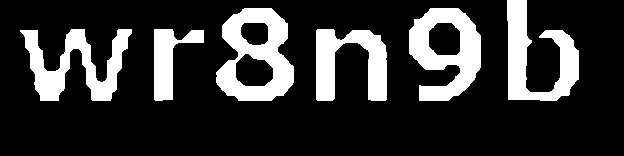

In [14]:
#Mostrar imagen
#cv2.imshow(img) No VALE este código
cv2_imshow(thresh)

In [15]:
# global thresholding
ret1,th1 = cv2.threshold(imgray,127,255,cv2.THRESH_BINARY)

# Otsu's thresholding
ret2,th2 = cv2.threshold(imgray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(imgray,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)



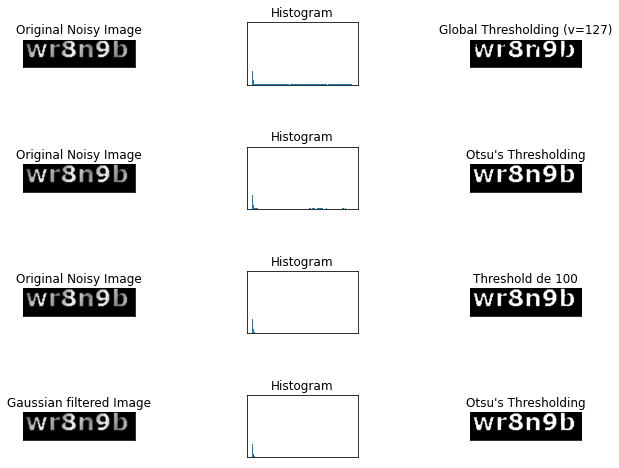

In [35]:
# plot all the images and their histograms
fig = plt.figure()

fig.subplots_adjust(hspace=1, wspace=1)
images = [imgray, 0, th1,
          imgray, 0, th2,
          imgray, 0, thresh,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Original Noisy Image','Histogram',"Threshold de 100",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]

for i in range(0,4):
    plt.subplot(4,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(4,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(4,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])

plt.gcf().set_size_inches([10,8])

In [17]:
contours, hierarchy = cv2.findContours(
#        thresh,cv2.RETR_TREE,
        thresh,cv2.RETR_EXTERNAL,
        cv2.CHAIN_APPROX_SIMPLE)
#listaContornos=list()



**Carga y utilización del Modelo**

In [19]:
from keras.models import load_model
import numpy as np

Using TensorFlow backend.


*Modelo 1*

In [20]:
#Cargar Modelo 1
nombreModelo=pathImagenes+'/'+'model.h5'
model = load_model(nombreModelo)
resultado=''

In [21]:
listaClases=['0','1','2','3','4','5','6','7','8','9',
 'A','B','C','D','E','F','G','H','I','J',
 'K','L','M','N','O','P','Q','R','S','T',
 'U','V','W','X','Y','Z','a','b','d','e',
 'f','g','h','n','q','r','t']
 


316 29 71 72


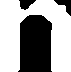

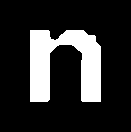

[43]
n
(28, 28)
154 29 50 72


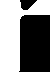

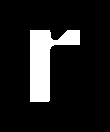

[45]
r
(28, 28)
20 29 112 72


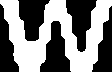

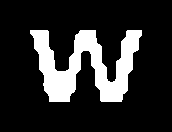

[32]
W
(28, 28)
409 8 72 93


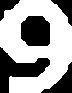

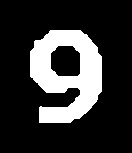

[41]
g
(28, 28)
216 8 78 93


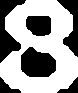

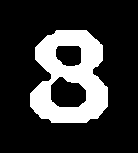

[28]
S
(28, 28)
507 0 72 101


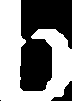

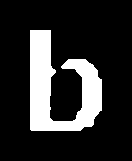

[37]
b
(28, 28)


In [34]:
#PRUEBA Modelo 1
for f in contours:
    cnt =f
    #epsilon = 0.1*cv2.arcLength(cnt,True)
    #approx = cv2.approxPolyDP(cnt,epsilon,True)
    x,y,w,h = cv2.boundingRect(cnt)
    print(x,y,w,h)
    letter=thresh[y:y+h,x:x+w]
    letter = cv2.dilate(letter,kernel, iterations = 1)

    tamanio=letter.shape
            
    img2 = np.zeros((30+tamanio[0]+30, 30+tamanio[1]+30), dtype = "uint8")
    img2[30:30+tamanio[0],30:30+tamanio[1]]=letter
    
    img = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
#        letter = thresh[y:y+h,x:x+w]
    cv2_imshow(letter)
    cv2_imshow(img2)
    letter = cv2.resize(img2,(28,28), interpolation = cv2.INTER_AREA)
    x_image = np.reshape(letter,(1,784))

    prediccion = model.predict_classes(x_image)
    print(prediccion)
    print(listaClases[prediccion[0]])
    resultado=resultado+str(listaClases[prediccion[0]])

    tamanio=letter.shape
    print(tamanio)
        

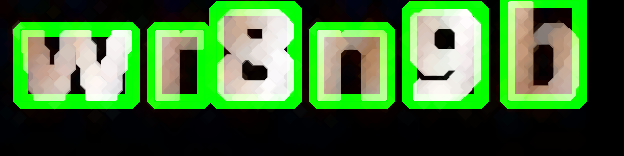

nrW98b


In [71]:
img = cv2.dilate(img,kernel, iterations = 1)
cv2_imshow(img)
#print(resultado)

*Modelo 2*

In [68]:
#Cargar Modelo 2
nombreModelo=pathImagenes+'/'+'modelCNV.h5'
model = load_model(nombreModelo)
resultado=''

316 29 71 72


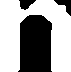

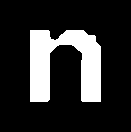

(28, 28)
(1, 28, 28, 1)
[43]
n
(28, 28)
154 29 50 72


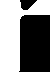

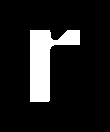

(28, 28)
(1, 28, 28, 1)
[45]
r
(28, 28)
20 29 112 72


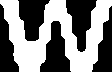

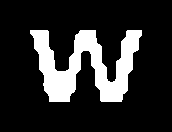

(28, 28)
(1, 28, 28, 1)
[32]
W
(28, 28)
409 8 72 93


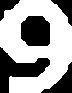

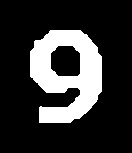

(28, 28)
(1, 28, 28, 1)
[9]
9
(28, 28)
216 8 78 93


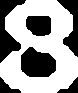

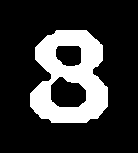

(28, 28)
(1, 28, 28, 1)
[8]
8
(28, 28)
507 0 72 101


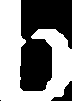

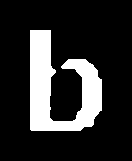

(28, 28)
(1, 28, 28, 1)
[37]
b
(28, 28)


In [70]:
#PRUEBA Modelo 2
for f in contours:
    cnt =f
    #epsilon = 0.1*cv2.arcLength(cnt,True)
    #approx = cv2.approxPolyDP(cnt,epsilon,True)
    x,y,w,h = cv2.boundingRect(cnt)
    print(x,y,w,h)
    letter=thresh[y:y+h,x:x+w]
    letter = cv2.dilate(letter,kernel, iterations = 1)

    tamanio=letter.shape
            
    img2 = np.zeros((30+tamanio[0]+30, 30+tamanio[1]+30), dtype = "uint8")
    img2[30:30+tamanio[0],30:30+tamanio[1]]=letter
    
    img = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
#        letter = thresh[y:y+h,x:x+w]
    cv2_imshow(letter)
    cv2_imshow(img2)
    letter = cv2.resize(img2,(28,28), interpolation = cv2.INTER_AREA)
    test_image = np.array(letter)
    test_image = test_image.astype('float32')
    test_image /= 255
    print(test_image.shape)

    # Your image shape is (, , 4)
    x_image = np.expand_dims(test_image, axis=-1)
    x_image = np.expand_dims(x_image, axis=0)
    print(x_image.shape)
    prediccion = model.predict_classes(x_image)
    resultado=resultado+str(listaClases[prediccion[0]])
    print(prediccion)
    print(listaClases[prediccion[0]])

    tamanio=letter.shape
    print(tamanio)
        

**Resumen de Resultados**

**Original:** wr8n9b

**Modelo 1:** wrSngb  -4/6-   66,7% - Acc test 84%


**Modelo 2:** wr8n9b  -6/6-   100% - Acc test 85%